## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LinearModels/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1)
y = data['target']

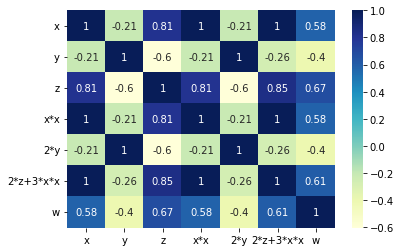

In [ ]:
data_corr = data.drop(['target'],axis=1)
sns.heatmap(data_corr.corr(),cmap='YlGnBu',annot=True)

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# **Task 1**

In [ ]:
model = SGDClassifier(loss='log')
param = {'alpha' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}
grid_search = GridSearchCV(model,param,scoring='accuracy',return_train_score='True',n_jobs=-1)
grid_search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   10.0, 100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [ ]:
grid_search.best_params_

{'alpha': 1e-05}

In [ ]:
grid_search.best_score_

1.0

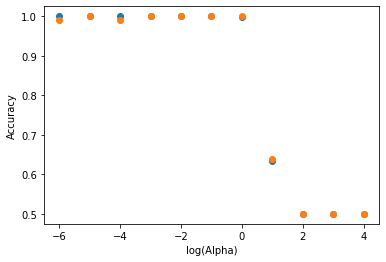

In [ ]:
log_space = np.log10(param["alpha"])
accuracy_train = grid_search.cv_results_["mean_train_score"]
accuracy_test = grid_search.cv_results_["mean_test_score"]
plt.scatter(log_space,accuracy_train)
plt.scatter(log_space,accuracy_test)
plt.ylabel("Accuracy")
plt.xlabel("log(Alpha)")
plt.show()

In [ ]:
lr_best_model = SGDClassifier(loss='log',alpha=1e-05)
lr_best_model.fit(X,y)
print(lr_best_model.score(X,y))
print(lr_best_model.coef_)

1.0
[[ 14.66575033 -16.09711785  36.04511943  12.97288188 -16.09711785
   16.02751925   9.55283866]]


In [ ]:
edited_X = X.applymap(lambda x: np.random.normal(loc=x,scale=1e-2))

In [ ]:
edited_X-X #change in dataset

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.007020,-0.003457,-0.007978,-0.011312,0.000888,-0.018678,-0.005265
1,0.003740,-0.006676,-0.007718,-0.001741,0.014109,-0.002413,0.012417
2,-0.007449,-0.029509,0.004996,0.014059,-0.002677,-0.001344,0.005050
3,-0.010558,0.000671,-0.009250,0.007119,0.006472,0.013347,-0.022339
4,0.009159,-0.013198,-0.011913,-0.007866,0.009808,0.014685,-0.017621
...,...,...,...,...,...,...,...
95,-0.009991,-0.007884,0.017757,0.007118,-0.000835,0.006234,0.009717
96,0.009939,0.004589,0.005551,-0.007641,0.000820,0.012627,0.008757
97,-0.009923,-0.011832,-0.002058,-0.003576,0.021459,0.011291,0.009155
98,-0.009917,0.001412,-0.013411,-0.000324,0.006529,-0.004961,-0.004960


In [ ]:
edited_X.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.588086,0.838380,-1.020956,-0.615337,0.842725,-0.684605,-0.541542
1,-0.890569,-0.214512,-1.020696,-0.884793,-0.193726,-0.919467,-0.509947
2,-1.215001,0.182524,-1.077316,-1.136860,0.209356,-1.167851,0.210788
3,-1.374731,0.002770,-0.952893,-1.273547,0.008572,-1.253193,-0.688059
4,-0.728529,1.038574,-1.024891,-0.752800,1.061579,-0.778061,-0.752675


In [ ]:
lr_best_model_edited = SGDClassifier(loss='log',alpha=1e-05)
lr_best_model_edited.fit(edited_X,y)
print(lr_best_model_edited.score(edited_X,y))
print(lr_best_model_edited.coef_)

1.0
[[ 29.17019691 -34.09026299  71.56093143  24.91114713 -34.44980889
   30.88941118  21.91022492]]


In [ ]:
change_in_acc = lr_best_model.score(X,y) - lr_best_model_edited.score(edited_X,y)
change_in_weights = (np.abs(lr_best_model.coef_ - lr_best_model_edited.coef_) / np.abs(lr_best_model.coef_))*100 #percentage change
Weights = dict()
for i,W in enumerate(change_in_weights[0]):
  Weights[i] = W

Weights

{0: 98.90013295900106,
 1: 111.7786756387988,
 2: 98.53154202391815,
 3: 92.02477416640764,
 4: 114.012279845301,
 5: 92.72733793725159,
 6: 129.35826409077256}

In [ ]:
top_change_in_weights = sorted(Weights,key= lambda x:Weights[x],reverse=True)[:4]
print("Top 4 features which have higher % change in weights compare to the other feature")
for i in top_change_in_weights:
  print("feature no.",i," change % of weight",Weights[i])

Top 4 features which have higher % change in weights compare to the other feature
feature no. 6  change % of weight 129.35826409077256
feature no. 4  change % of weight 114.012279845301
feature no. 1  change % of weight 111.7786756387988
feature no. 0  change % of weight 98.90013295900106


# Task 2

In [ ]:
model = SGDClassifier(loss='hinge') #svm
param = {'alpha' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}
grid_search = GridSearchCV(model,param,scoring='accuracy',return_train_score='True',n_jobs=-1)
grid_search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   10.0, 100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [ ]:
grid_search.best_params_

{'alpha': 0.01}

In [ ]:
grid_search.best_score_

1.0

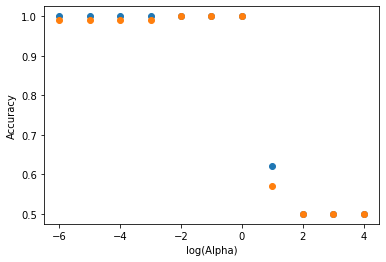

In [ ]:
log_space = np.log10(param["alpha"])
accuracy_train = grid_search.cv_results_["mean_train_score"]
accuracy_test = grid_search.cv_results_["mean_test_score"]
plt.scatter(log_space,accuracy_train)
plt.scatter(log_space,accuracy_test)
plt.ylabel("Accuracy")
plt.xlabel("log(Alpha)")
plt.show()

In [ ]:
lr_best_model = SGDClassifier(loss='log',alpha=grid_search.best_params_["alpha"])
lr_best_model.fit(X,y)
print(lr_best_model.score(X,y))
print(lr_best_model.coef_)

1.0
[[ 0.71658073 -0.91140851  1.70125802  0.64963609 -0.91140851  0.79007506
   0.50461768]]


In [ ]:
edited_X = X.applymap(lambda x: np.random.normal(loc=x,scale=1e-2))

In [ ]:
lr_best_model_edited = SGDClassifier(loss='log',alpha=grid_search.best_params_["alpha"])
lr_best_model_edited.fit(edited_X,y)
print(lr_best_model_edited.score(edited_X,y))
print(lr_best_model_edited.coef_)

1.0
[[ 0.71902794 -0.91388518  1.70339421  0.66117192 -0.91139248  0.81024187
   0.51013384]]


In [ ]:
change_in_acc = lr_best_model.score(X,y) - lr_best_model_edited.score(edited_X,y)
change_in_weights = (np.abs(lr_best_model.coef_ - lr_best_model_edited.coef_) / np.abs(lr_best_model.coef_))*100 #percentage change
Weights = dict()
for i,W in enumerate(change_in_weights[0]):
  Weights[i] = W

Weights

{0: 0.3415123435929632,
 1: 0.27174120189527706,
 2: 0.125565445994535,
 3: 1.775736976322582,
 4: 0.001758602485790047,
 5: 2.552518251107716,
 6: 1.0931361112265408}

In [ ]:
top_change_in_weights = sorted(Weights,key= lambda x:Weights[x],reverse=True)[:4]
print("Top 4 features which have higher % change in weights compare to the other feature")
for i in top_change_in_weights:
  print("feature no.",i," change % of weight",Weights[i])

Top 4 features which have higher % change in weights compare to the other feature
feature no. 5  change % of weight 2.552518251107716
feature no. 3  change % of weight 1.775736976322582
feature no. 6  change % of weight 1.0931361112265408
feature no. 0  change % of weight 0.3415123435929632


# Observations

### Logistic regression

After adding small error:
1.   No change in accuracy 
2.   High change in weights.

### SVM

After adding small error:
1.   No change in accuracy 
2.   Small change in weights.